In [70]:
import pandas as pd
import matplotlib.pyplot as plt
#设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
#正确显示’-‘
plt.rcParams['axes.unicode_minus'] = False
# 读取数据
file_path = '完整附件2_经济效益.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')


In [71]:
# 清理和转换数据
df_cleaned = df.dropna(subset=['亩产经济效益/(元/亩)', '作物经济效益/(万元)'])  # 移除缺失值
df_cleaned['亩产经济效益/(元/亩)'] = pd.to_numeric(df_cleaned['亩产经济效益/(元/亩)'], errors='coerce')
df_cleaned['作物经济效益/(万元)'] = pd.to_numeric(df_cleaned['作物经济效益/(万元)'], errors='coerce')

# 分析不同地块类型的平均亩产经济效益
land_type_hectare = df_cleaned.groupby(['地块类型','作物名称'])['亩产经济效益/(元/亩)'].mean().reset_index()
# 分析不同地块类型的作物平均经济效益
land_type_total = df_cleaned.groupby(['地块类型','作物名称'])['作物经济效益/(万元)'].mean().reset_index()

# 分析不同作物的平均作物经济效益
crop_type_total = df_cleaned.groupby(['作物类型', '作物名称'])['作物经济效益/(万元)'].mean().reset_index()
# 分析不同作物的平均亩产经济效益
crop_type_hectare = df_cleaned.groupby(['作物类型', '作物名称'])['亩产经济效益/(元/亩)'].mean().reset_index()

#导出文件以便进一步绘图
crop_type_total.to_excel("crop_type_total.xlsx")
land_type_hectare.to_excel("land_type_hectare.xlsx")
# land_type_total.to_excel("land_type_total.xlsx")
# crop_type_hectare.to_excel("crop_type_hectare.xlsx")


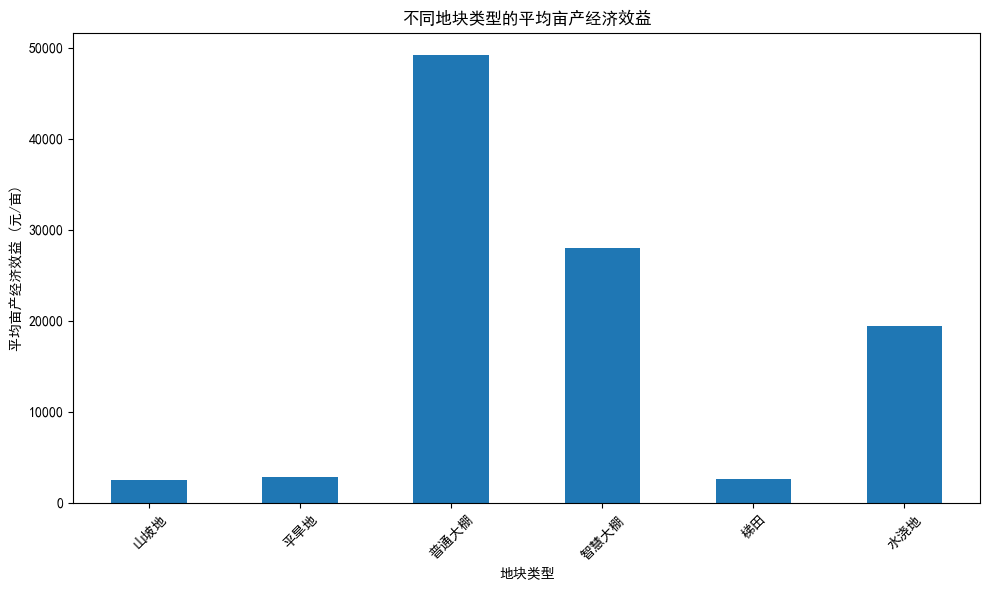

In [68]:
# Group by land type and calculate the mean of economic benefit per mu (亩)
grouped_hectare = df.groupby('地块类型')['亩产经济效益/(元/亩)'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
grouped_hectare.plot(kind='bar')

plt.title('不同地块类型的平均亩产经济效益')
plt.ylabel('平均亩产经济效益 (元/亩)')
plt.xlabel('地块类型')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()
grouped_hectare.to_excel("grouped_hectare.xlsx")

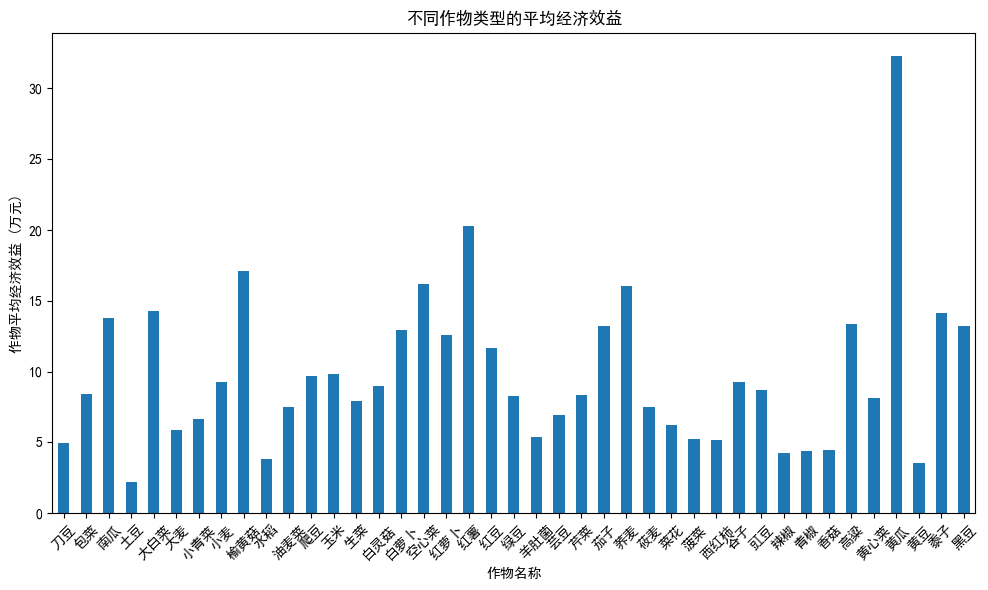

In [23]:
# Group by crop type and calculate the mean of economic benefit per mu (亩)
crop_type_benefit = df.groupby('作物名称')['作物经济效益/(万元)'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
crop_type_total.plot(kind='bar')

plt.title('不同作物类型的平均经济效益')
plt.ylabel('作物平均经济效益 (万元)')
plt.xlabel('作物名称')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [69]:
# 处理蔬菜的两季经济效益，使用"作物经济效益/(万元)"字段求和
df['总蔬菜经济效益'] = df.apply(lambda row: row['作物经济效益/(万元)'] if row['作物类型'] == '蔬菜' else 0, axis=1)

# 处理食用菌作物，只考虑第二季
df['总食用菌经济效益'] = df.apply(lambda row: row['作物经济效益/(万元)'] if row['作物类型'] == '食用菌' and row['地块类型'] == '普通大棚' else 0, axis=1)

# 处理其他普通作物
df['总普通作物经济效益'] = df.apply(lambda row: row['作物经济效益/(万元)'] if row['作物类型'] not in ['蔬菜', '食用菌'] else 0, axis=1)

# 计算每个地块类型上的作物数量（包括蔬菜、食用菌和其他作物）
df['作物数量'] = 1  # 每一行代表一个作物
grouped_count = df.groupby('地块类型')['作物数量'].count()

# 计算各类作物的总经济效益
grouped_df = df.groupby('地块类型').agg({
    '总蔬菜经济效益': 'sum',
    '总食用菌经济效益': 'sum',
    '总普通作物经济效益': 'sum'
})

# 计算每个地块类型的总作物经济效益
grouped_df['总作物经济效益'] = grouped_df['总蔬菜经济效益'] + grouped_df['总食用菌经济效益'] + grouped_df['总普通作物经济效益']

# 将作物总数加入到grouped_df中
grouped_df['作物总数'] = grouped_count

# 计算每个地块类型的总作物平均经济效益
grouped_df['平均作物经济效益'] = grouped_df['总作物经济效益'] / grouped_df['作物总数']
# grouped_df.to_excel("grouped_df.xlsx")


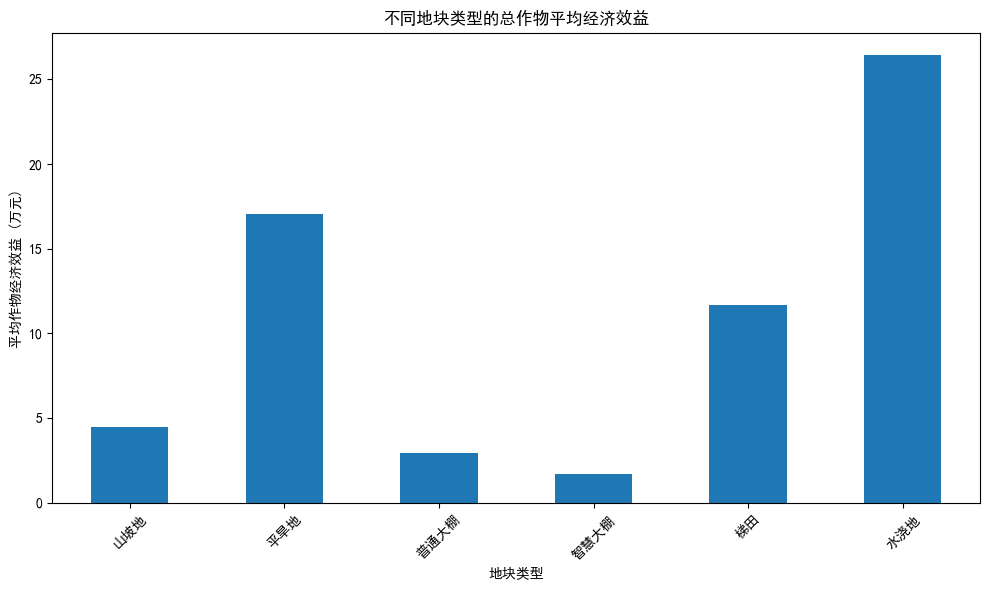

In [26]:
# 绘制不同地块类型的总作物平均经济效益柱状图
plt.figure(figsize=(10, 6))
grouped_df['平均作物经济效益'].plot(kind='bar')

plt.title('不同地块类型的总作物平均经济效益')
plt.ylabel('平均作物经济效益 (万元)')
plt.xlabel('地块类型')
plt.xticks(rotation=45)
plt.tight_layout()

# 显示图表
plt.show()
